# ST2195 Programming for Data Science
# Graphics and Data Visualisation in Python

## Plotting in Python

In Python, **matplotlib** and **seaborn** are two main Python libraries for plots. 
**matplotlib** is a basic plotting library. **seaborn** is a Python data visualization library based on matplotlib, and it provides some “prettier” and sometimes more interesting plots. 
We use both **matplotlib** and seaborn in this notebook, although we mainly use matplotlib here. 

We import the libraries as follows:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# List all of the available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# Set the colour palette to colour-blind friendly 🍕
sns.reset_orig()
my_palette = sns.color_palette()
plt.style.use("seaborn-colorblind")

We will first start with the basics of matplotlib, which includes how to create a space for the plot, and how to make a basic plot. We will then talk about how to create different plots including:
- Line plot
- Bar plot
- Boxplot
- Scatter plot
- Heat map

using matplotlib and seaborn. 
Before we introduce how to use the plotting libraries, let us first
load the data for visualisation.

In [5]:
sns.color_palette()

[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Import and Clean the Data

We use GDP per capita data from DBnomics and wine chemistry composition data from **scikit-learn** in this notebook. The data are already downloaded and stored in three csv files: gdp.csv, gdp_wide and wine.csv and we load the data to Python with the following code:

In [6]:
import numpy as np
import pandas as pd
import json
from datetime import datetime

In [7]:
# %cd PythonVis/
%pwd
# !ls

'/Users/moebqr/Documents/GitHub/ST2195-Programming-for-Data-Science/Block7/Lecture7C'

Load the csv file

In [8]:
gdp = pd.read_csv("gdp.csv")

In [9]:
gdp.head()

,year,value,country
0,2000-01-01,27130.0,UK
1,2001-01-01,27770.0,UK
2,2002-01-01,28250.0,UK
3,2003-01-01,29060.0,UK
4,2004-01-01,29560.0,UK


Create a dataframe for each country

In [10]:
# get the GDP per capita data for each country
# reset_index so that each Series has indexes 0,1,2,3...
gdp_uk = gdp[gdp['country']=='UK'].reset_index()
gdp_fr = gdp[gdp['country']=='FR'].reset_index()
gdp_it = gdp[gdp['country']=='IT'].reset_index()
gdp_de = gdp[gdp['country']=='DE'].reset_index()

In [11]:
gdp_wide = pd.read_csv("gdp_wide.csv")
# set the row labels as countries
gdp_wide.set_index('country', inplace= True)
# set the column labels (years) with the type int
gdp_wide.columns = gdp_wide.columns.astype(int)

In [12]:
wine = pd.read_csv("wine.csv")

gdp_uk, gdp_fr, gdp_it, gdp_de store the GDP per capita time series for a corresponding
country.

In [13]:
gdp_uk

,index,year,value,country
0,0,2000-01-01,27130.0,UK
1,1,2001-01-01,27770.0,UK
2,2,2002-01-01,28250.0,UK
3,3,2003-01-01,29060.0,UK
4,4,2004-01-01,29560.0,UK
5,5,2005-01-01,30210.0,UK
6,6,2006-01-01,30810.0,UK
7,7,2007-01-01,31280.0,UK
8,8,2008-01-01,30940.0,UK
9,9,2009-01-01,29460.0,UK


In [14]:
gdp_wide

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,
DE,28910.0,29370.0,29290.0,29100.0,29470.0,29730.0,30930.0,31920.0,32320.0,30580.0,31940.0,33200.0,33280.0,33330.0,33920.0,34130.0,34610.0,35380.0,35720.0,35840.0
FR,28930.0,29290.0,29410.0,29440.0,30050.0,30320.0,30850.0,31400.0,31310.0,30250.0,30690.0,31210.0,31160.0,31170.0,31320.0,31540.0,31770.0,32380.0,32860.0,33270.0
IT,27430.0,27950.0,27960.0,27850.0,28030.0,28090.0,28480.0,28730.0,28230.0,26590.0,26930.0,27020.0,26090.0,25480.0,25420.0,25640.0,26020.0,26490.0,26780.0,26920.0
UK,27130.0,27770.0,28250.0,29060.0,29560.0,30210.0,30810.0,31280.0,30940.0,29460.0,29830.0,29960.0,30190.0,30660.0,31290.0,31780.0,32060.0,32430.0,32640.0,32870.0


wine stores the chemistry composition of wines in a table, with the last column provides the information of which class the wines belong to.

In [15]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


## `matplotlib` Basics

## Creating and Empty Plot

We first learn how to create a empty figure. It can be done by:

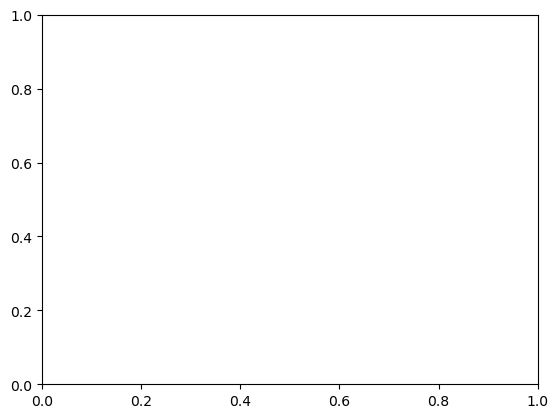

In [16]:
fig, ax = plt.subplots()
plt.show()

this return a Figure and an Axes object. By manipulating these objects, we can plot and set the
properties of the plot. `plt.show()` is used to make sure the plot is shown (although the plot may
still be shown without calling plt.show()).
In this notebook we focus on manipulating the plots using Axes object ax or plt but not the
Figure object fig. If you want to learn how you can use Figure object to manipulate the plots,
please see here.

## Plotting Using ax

After the empty plot is created, we can plot the data by using the Axes object ax and the method `plot()`. Here plot the GDP per capital time series data:

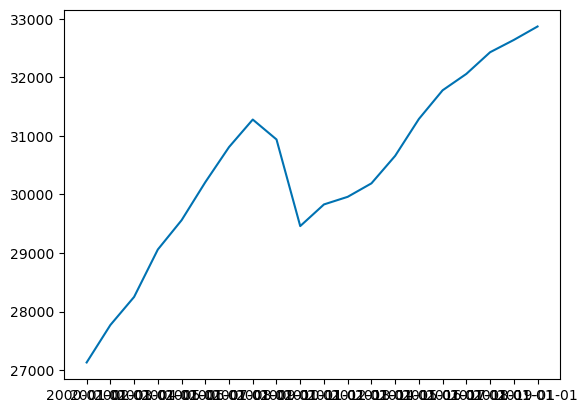

In [17]:
fig, ax = plt.subplots()
ax.plot(gdp_uk['year'], gdp_uk['value'])
plt.show()

In [18]:
gdp_uk['year'] = gdp_uk['year'].str[:4]
gdp_uk

,index,year,value,country
0,0,2000,27130.0,UK
1,1,2001,27770.0,UK
2,2,2002,28250.0,UK
3,3,2003,29060.0,UK
4,4,2004,29560.0,UK
5,5,2005,30210.0,UK
6,6,2006,30810.0,UK
7,7,2007,31280.0,UK
8,8,2008,30940.0,UK
9,9,2009,29460.0,UK


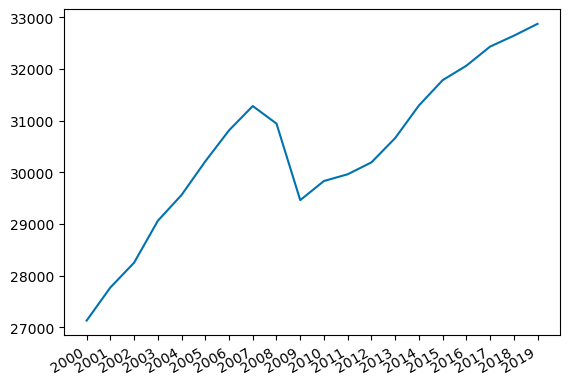

In [19]:
# You can fix the x-axis tick labels by rotating them a bit
fig, ax = plt.subplots()
ax.plot(gdp_uk['year'], gdp_uk['value'])
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

## Plotting Multiple Subplots

Similar to R, we can have multiple subplots in one figure. This can be done by specifying the number of rows/columns of the subplot grid in the `subplots()` function. 
It returns a figure and a collection of axes objects. 
We can plot the data on each of the subplots via the axes, and here
we use different GDP per capita time series to illustrate it:

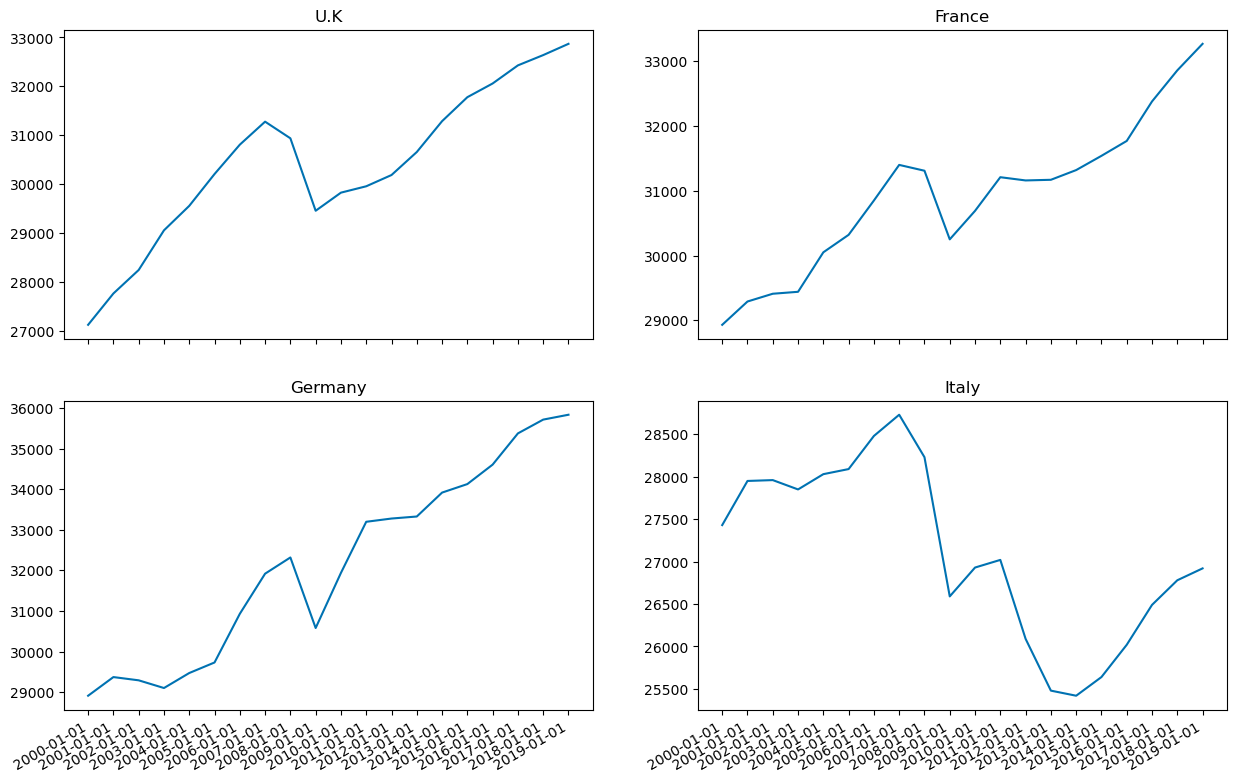

In [20]:
# Copy from Study Guide page 355

fig, ax = plt.subplots(2, 2, figsize = (15,10)) # ax is an array of an array (2x2)

ax[0][0].plot(gdp_uk['year'], gdp_uk['value']) # top left
ax[0][0].title.set_text('U.K')

ax[0][1].plot(gdp_fr['year'], gdp_fr['value']) # top right
ax[0][1].title.set_text('France')

ax[1][0].plot(gdp_de['year'], gdp_de['value'], label = 'Germany') # bottom left
ax[1][0].title.set_text('Germany')

ax[1][1].plot(gdp_it['year'], gdp_it['value'], label = 'Italy') # bottom right
ax[1][1].title.set_text('Italy')

fig.autofmt_xdate()

plt.show()



The argument figsize in subplots() determines the size of the figure.

## Plotting Multiple Lines on the Same Plot

Similar to R, we can plot multiple lines on the same subplot. This can be done by calling plot()
via the same axes (here ax[0][0]) with different data (as illustrated below).
ax[0][0].legend() creates the legend for the lines for the top left subplot. We can add label,
title, etc. to the subplot by manipulating via ax:

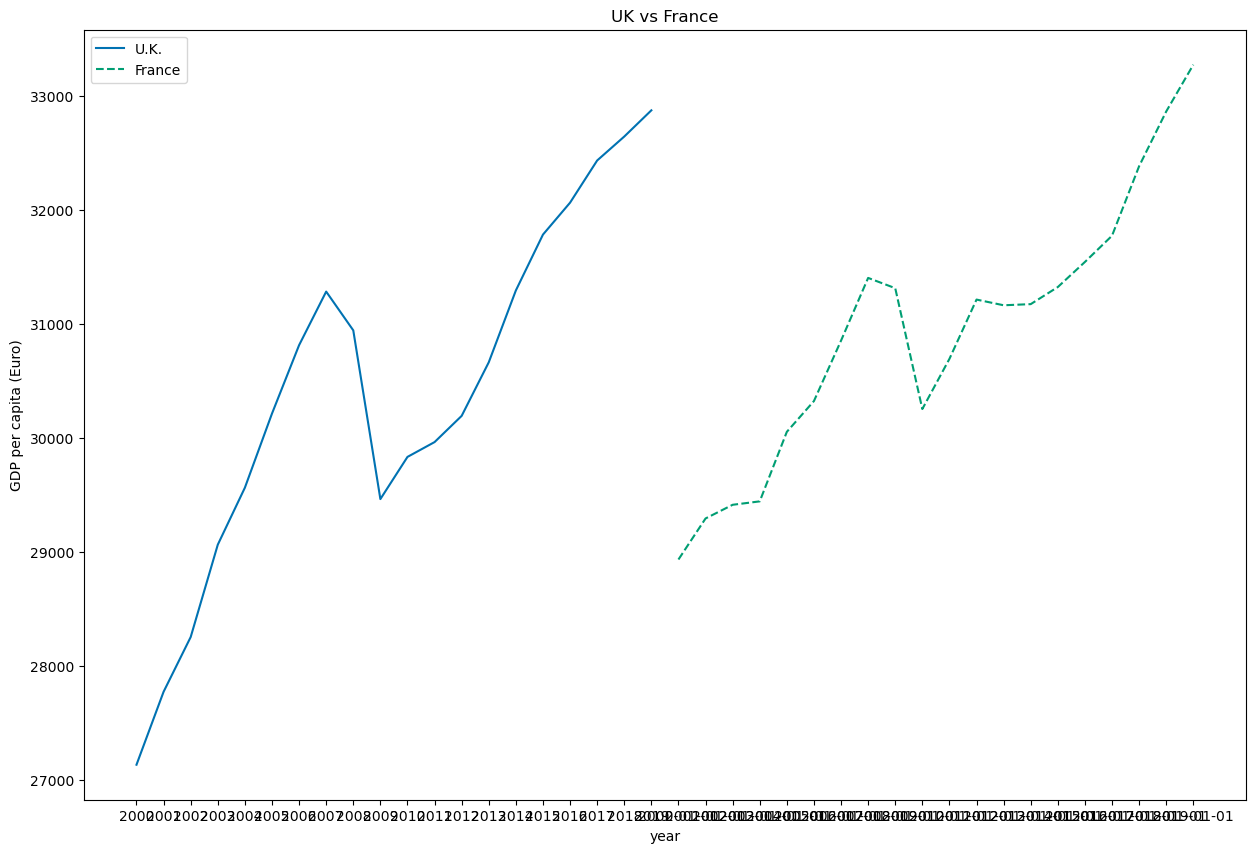

In [22]:
fig, ax = plt.subplots(figsize=(15,10))

# Use ax directly instead of ax[0][0]
ax.plot(gdp_uk['year'], gdp_uk['value'], label='U.K.')
ax.plot(gdp_fr['year'], gdp_fr['value'], '--', label='France')
ax.legend()

ax.set_xlabel("year")
ax.set_ylabel("GDP per capita (Euro)")
ax.title.set_text('UK vs France')

plt.show()

## Line Plot With `plt`

Above we have shown how to plot using `ax`, as it is handy to specify which subplot to plot by working on `ax`. 
If we only have one subplot, we can work on either `plt` or `ax`. 
They will give you the same figure, although the syntax is different. 
Below we show how the same plot can be made by `plt` (first plot) and `ax` (second plot):

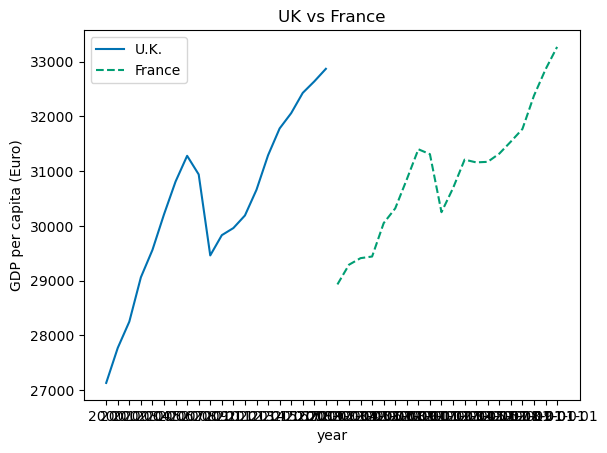

In [23]:
plt.plot(gdp_uk['year'], gdp_uk['value'], label = 'U.K.')
plt.plot(gdp_fr['year'], gdp_fr['value'], '--', label = 'France')
plt.legend()
plt.xlabel('year')
plt.ylabel('GDP per capita (Euro)')
plt.title("UK vs France")

#plt.locator_params(axis='both', nbins=4)
#ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()

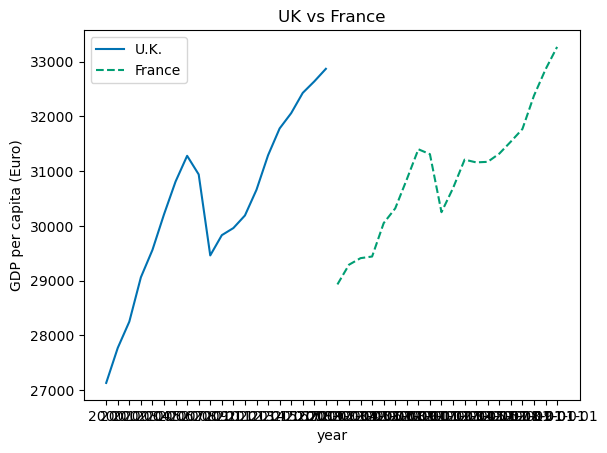

In [24]:
fig, ax = plt.subplots()

ax.plot(gdp_uk['year'], gdp_uk['value'], label = 'U.K.')
ax.plot(gdp_fr['year'], gdp_fr['value'], '--', label = 'France')

ax.legend()
ax.set_xlabel('year') # note it was plt.xlabel('year') above
ax.set_ylabel('GDP per capita (Euro)')
ax.title.set_text("UK vs France") # note it was plt.title("UK vs France") above

plt.show()

In [25]:
gdp_uk['year']

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
Name: year, dtype: object

Have a look at this explanation of the difference between plt and axis

https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl

The names of objects
Matplotlib is strongly object oriented and its principal objects are the figure and the axes (I find the name axes a bit misleading, but probably it's just me).

You can think of the figure as a canvas, of which you typically specify the dimensions and possibly e.g., the background color etc etc. You use the canvas, the figure, essentially in two ways, placing other objects on it (mostly axes, but also text labels etc) and saving its contents with savefig.

You can think of an axes as a sort of Swiss Army knife, a handy object that offers a tool (e.g. .plot, .scatter, .hist etc) for everything, mostly. You can place one, two, ... many axes inside a figure using one of many different methods.



A great introduction to the terminology of 
matplotlib 
https://www.skytowner.com/explore/getting_started_with_matplotlib

## Line Plot With pandas Data Structure

Alternatively, you can plot by using the method plot() from pandas Series or DataFrame.
Behind the scene, pandas calls the plot functions from matplotlib, so you can consider pandas’
plot() method is just a convenient shortcut to plot. As you can see below, plotting via pandas
plot() method can create the same plot (slight different in figure size and the x label rotation for
this particular example) as above when we use matplotlib plot() function. Sometimes, though,
it is more convenient to plot via pandas. See the side by side bar plot example later in this page.

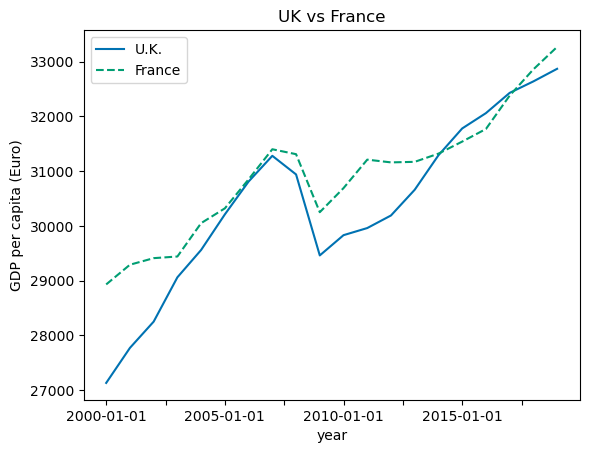

In [26]:
fig, ax = plt.subplots()

gdp_uk.plot(x = 'year', y = 'value', ax = ax)
gdp_fr.plot(x = 'year', y = 'value', style = '--', ax = ax)

ax.legend(["U.K.", "France"])
ax.set_xlabel('year')
ax.set_ylabel('Euro')
ax.set_ylabel('GDP per capita (Euro)')
ax.title.set_text("UK vs France")
plt.show()

## Bar Plot

Here we continue to plot the GDP per capital data, but now we are plotting against different
countries rather than time. We can plot the bars vertically or horizontally:

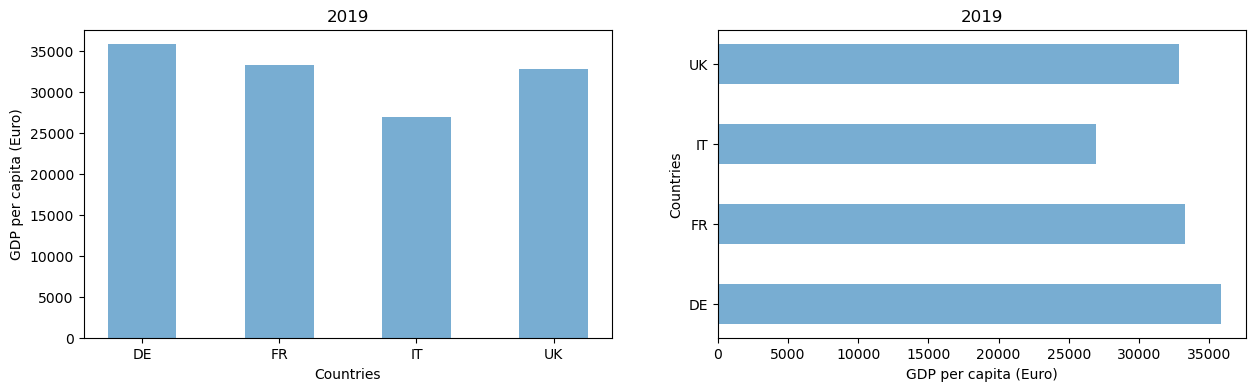

In [229]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ======== vertical bars ========
# ax = ax[0] indicates its the first subplot

ax[0].bar(gdp_wide[2019].index, gdp_wide[2019], alpha = 0.6, # the argument alpha =0.6 makes the bars slightly transparent
width = 0.5) # the argument width = 0.5 makes the bars thinner

ax[0].set_ylabel('GDP per capita (Euro)')
ax[0].set_xlabel('Countries')
ax[0].title.set_text("2019")

# ======== horizontal bars ========
# ax = ax[1] indicates its the second subplot
ax[1].barh(gdp_wide[2019].index, gdp_wide[2019], alpha = 0.6,
height = 0.5) # note here we use "height" to make the bars thinner
ax[1].set_xlabel('GDP per capita (Euro)')
ax[1].set_ylabel('Countries')
ax[1].title.set_text("2019")

plt.show()

## Bar Plot With pandas

Like the line plots, we can plot bar plot using DataFrame plot() instead. Note the plot()
arguments are different.

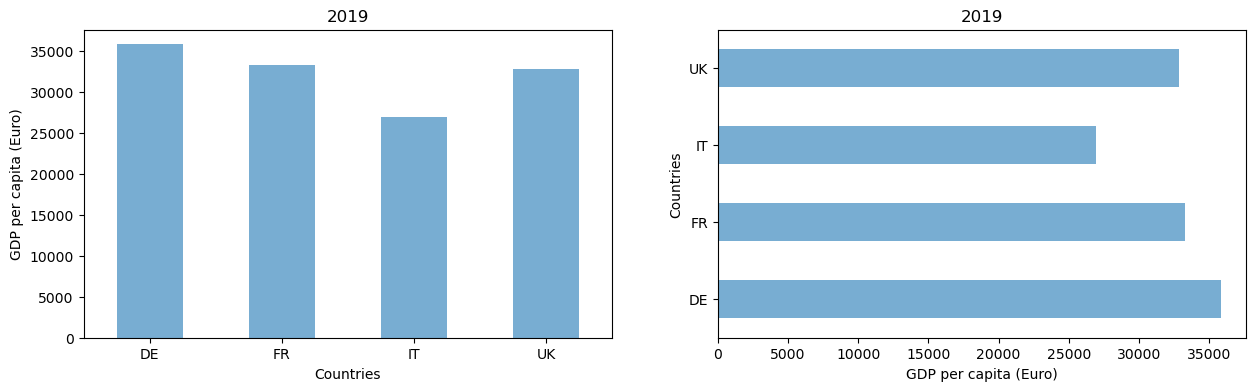

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ======== vertical bars ========
gdp_wide[2019].plot.bar(x = 'country', y = 'value', rot = 0, # rot = 0: what if you omit it?
ax = ax[0], # note we need to give ax as an argument
legend = False, alpha = 0.6) # legend = False: not to show legend
ax[0].set_ylabel('GDP per capita (Euro)')
ax[0].set_xlabel('Countries')
ax[0].title.set_text("2019")

# ======== horizontal bars ========
gdp_wide[2019].plot.barh(x='country', y='value', ax = ax[1], legend = False, alpha= 0.6)
ax[1].set_xlabel('GDP per capita (Euro)')
ax[1].set_ylabel('Countries')
ax[1].title.set_text("2019")